In [14]:
import librosa
from scipy.io import wavfile as wav
import numpy as np

filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Kicks/BTDK_Kick_01.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate 22050


C:\Users\Sil\Anaconda3\envs\testenv\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [15]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

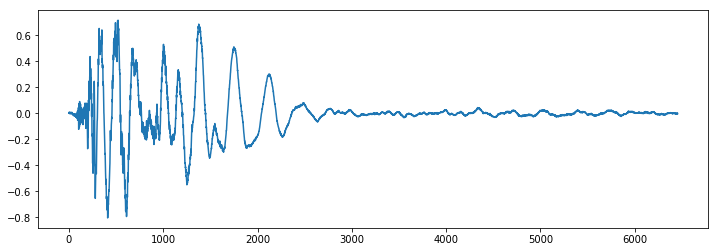

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [26]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)
stft = np.abs(librosa.stft(librosa_audio))
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=librosa_sample_rate).T, axis=0)

(40, 13)


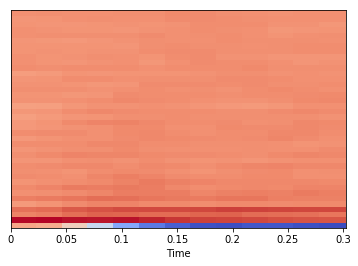

In [6]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

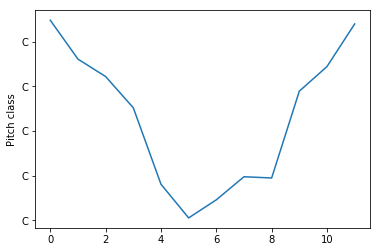

In [24]:
import matplotlib.pyplot as plt
values = chroma
plt.figure()
ax = plt.gca()
ax.plot(values)
ax.yaxis.set_major_formatter(librosa.display.ChromaFormatter())
ax.set_ylabel('Pitch class')
plt.show()

In [11]:
import librosa
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import os

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        stft = np.abs(librosa.stft(audio))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        mfccsscaled = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file:", file_name)
        return None
    
    return mfccsscaled, chroma

metadata = pd.read_csv('C:/dev/school/samples.csv')

features = []

for index, row in metadata.iterrows():
    
    file_name = str(row["path"])
    class_label = row[1]
    data, data2 = extract_features(file_name)
    #print(data)
    features.append([data, class_label])
    print(data2)

featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

[0.8068435  0.7617933  0.7376795  0.6661191  0.5261443  0.43229163
 0.43421754 0.5045937  0.5656543  0.6016276  0.6379941  0.73741096]
[0.41748187 0.36334106 0.4698305  0.6134746  0.5507572  0.4058721
 0.3485371  0.38855156 0.39652565 0.45166945 0.56208026 0.45069888]
[0.5074753  0.5569973  0.7336973  0.8468956  0.7943103  0.5858405
 0.43436155 0.36838537 0.33631843 0.36077514 0.43759158 0.4710546 ]
[0.30933255 0.37802768 0.48154137 0.5376608  0.56036687 0.5012963
 0.36862636 0.35950038 0.4022563  0.45501    0.41263875 0.34808296]
[0.7299495  0.7305155  0.6805186  0.6054153  0.54036635 0.51762563
 0.5019633  0.53862256 0.63531214 0.6901786  0.7188055  0.71728694]
[0.400622   0.37802708 0.41103134 0.4431063  0.4208268  0.37863243
 0.39075696 0.47035587 0.5254472  0.5498247  0.46827254 0.42298236]
[0.44347283 0.49664077 0.6735029  0.79109365 0.7298346  0.54846936
 0.5081593  0.5552538  0.6109363  0.61775357 0.53697544 0.4640423 ]
[0.72597605 0.7440396  0.76743907 0.7546456  0.73056954 0.

[0.4950737  0.43882298 0.45236236 0.38698015 0.42572293 0.49755895
 0.5102992  0.9854169  0.956102   0.5491846  0.53933054 0.58426607]
[0.8670195  0.68325406 0.46084708 0.47976056 0.46552867 0.47692257
 0.66561204 0.64075965 0.670962   0.6350864  0.79602474 0.8259305 ]
[0.44820362 0.43549913 0.37300727 0.36573535 0.42739412 0.41711798
 0.59689593 0.978      0.9040567  0.8773736  0.6974397  0.5538264 ]
[0.92241204 0.7751021  0.8357718  0.7305297  0.76725113 0.87925816
 0.8673726  0.80620205 0.9217967  0.93678844 0.90290326 0.91872   ]
[0.97515273 0.70947146 0.67811465 0.61732155 0.5406816  0.63743585
 0.63038146 0.80275726 0.8498358  0.85139203 0.80310166 0.85944515]
[0.8770958  0.7880256  0.6865679  0.5855652  0.66795087 0.8607651
 0.76914483 0.8498726  0.971892   0.7866578  0.76374835 0.8073839 ]
[0.8812262  0.93023545 0.87359047 0.7912148  0.87016183 0.91810226
 0.9037277  0.8269411  0.7712737  0.7283306  0.86110437 0.9123183 ]
[0.953441   0.9339756  0.8069212  0.75940627 0.72901356 

[0.80802274 0.79711777 0.77600783 0.7585918  0.7003633  0.721801
 0.7653556  0.8476671  0.8760469  0.90512145 0.86805785 0.8204093 ]
[0.8371621  0.8403627  0.76065165 0.7307856  0.7802761  0.7655137
 0.71678114 0.76212204 0.82438964 0.9130691  0.9418728  0.90300125]
[0.76451117 0.6603657  0.6035271  0.6170049  0.60805315 0.6438836
 0.6780051  0.79387933 0.9285     0.9601967  0.8431711  0.7923628 ]
[0.6646837  0.70828396 0.7741821  0.8005263  0.78652245 0.81038743
 0.75838    0.80978537 0.8562501  0.7718806  0.6826458  0.65405977]
[0.803619   0.79172415 0.85320663 0.88143414 0.7682514  0.7063829
 0.681191   0.68522364 0.75328755 0.85190344 0.7742735  0.8034791 ]
[0.96769077 0.9076593  0.8399033  0.7888975  0.8326183  0.8877771
 0.8353138  0.76370275 0.81645226 0.84595525 0.8571462  0.9311049 ]
[0.7632454  0.8432712  0.8995992  0.8486846  0.8140606  0.70871943
 0.5928083  0.52307045 0.47660136 0.47405753 0.52089465 0.62144715]
[0.5272013  0.55756783 0.71653116 0.51114374 0.41851315 0.517

[0.9096579  0.8475897  0.8545015  0.88417935 0.945405   0.89614
 0.87220883 0.87377787 0.834301   0.75642127 0.8356721  0.9062642 ]
[0.8477389  0.83481485 0.75800186 0.7684095  0.6758281  0.6610799
 0.876334   0.8426092  0.78891885 0.91884995 1.         0.87157124]
[0.9288732  0.8715141  0.7478712  0.69952863 0.6942811  0.77127576
 0.76968014 0.79660225 0.80366504 0.8807644  0.901708   0.86530334]
[0.9733961  0.7979292  0.8700523  0.68583715 0.7474359  0.83180326
 0.8446902  0.7965052  0.7684971  0.8266398  0.92678666 0.91869974]
[0.7830836  0.81955665 0.88234806 0.83663034 0.80104727 0.80760825
 0.7412028  0.7526062  0.8038371  0.89441735 0.8077341  0.81520206]
[0.75345266 0.7529869  0.71285814 0.7635673  0.844084   0.8817099
 0.737857   0.71417433 0.785028   0.9194891  0.96010745 0.82288915]
[0.7696229  0.88069    0.8323795  0.73319674 0.75889903 0.7291137
 0.7028853  0.6962572  0.7530024  0.7523252  0.8321847  0.8812133 ]
[0.7646547  0.7186539  0.8029367  0.8090846  0.71748835 0.767

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features to numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


In [9]:
y

array(['Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Break', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Break', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 10)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
__________

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Instructions for updating:
Use tf.cast instead.
Train on 172 samples, validate on 44 samples
Epoch 1/100
172/172 [==============================] - 1s 3ms/step - loss: 13.1546 - acc: 0.1163 - val_loss: 12.1019 - val_acc: 0.1591

Epoch 00001: val_loss improved from inf to 12.10187, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/100
172/172 [==============================] - 0s 163us/step - loss: 13.0635 - acc: 0.1512 - val_loss: 11.2993 - val_acc: 0.2955

Epoch 00002: val_loss improved from 12.10187 to 11.29930, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 3/100
172/172 [==============================] - 0s 140us/step - loss: 12.2027 - acc: 0.1977 - val_loss: 12.8212 - val_acc: 0.2045

Epoch 00003: val_loss did not improve from 11.29930
Epoch 4/100
172/172 [==============================] - 0s 163us/step - loss: 12.4421 - acc: 0.1977 - val_loss: 12.8212 - val_acc: 0.2045

Epoch 00004: val_loss did not improve from 11.29930
Epoch 5/100
172/172 [=======

172/172 [==============================] - 0s 140us/step - loss: 6.4741 - acc: 0.5640 - val_loss: 6.9614 - val_acc: 0.5000

Epoch 00040: val_loss did not improve from 6.37780
Epoch 41/100
172/172 [==============================] - 0s 140us/step - loss: 7.0394 - acc: 0.5349 - val_loss: 7.3171 - val_acc: 0.4773

Epoch 00041: val_loss did not improve from 6.37780
Epoch 42/100
172/172 [==============================] - 0s 140us/step - loss: 6.6679 - acc: 0.5523 - val_loss: 7.6465 - val_acc: 0.5000

Epoch 00042: val_loss did not improve from 6.37780
Epoch 43/100
172/172 [==============================] - 0s 140us/step - loss: 6.8678 - acc: 0.5233 - val_loss: 7.1991 - val_acc: 0.5000

Epoch 00043: val_loss did not improve from 6.37780
Epoch 44/100
172/172 [==============================] - 0s 140us/step - loss: 6.6634 - acc: 0.5465 - val_loss: 6.7105 - val_acc: 0.5682

Epoch 00044: val_loss did not improve from 6.37780
Epoch 45/100
172/172 [==============================] - 0s 140us/step - l

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7093023241952409
Testing Accuracy:  0.659090903672305


In [ ]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_probability_vector = model.predicted_probability(prediction_feature) 
    predicted_probability = predicted_probability_vector[0]
    for i in range(len(predicted_probability)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_probability[i], '.32f') )

In [ ]:
filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Muffled Drums Vol. 1/Cymbals/Ride/Ride (28).wav' 
print_prediction(filename)